In [74]:
import torch
import torch.nn as nn
import torchvision 
from torchvision import transforms
import matplotlib.pyplot as plt

In [122]:
#torchvision.datasets.FashionMNIST(root: str, train: bool = True, transform: Optional[Callable] = None, target_transform: Optional[Callable] = None, download: bool = False)


train_f = torchvision.datasets.FashionMNIST('./data/FashionMNIST',
    train = True,
    download = True,
    transform = transforms.Compose([
        transforms.ToTensor()                                 
    ])
)

train_ds = torch.utils.data.DataLoader(train_f)

test_f = torchvision.datasets.FashionMNIST('./data/FashionMNIST',
    train = False,
    download = True,
    transform = transforms.Compose([
        transforms.ToTensor()                                 
    ])
)
test_ds = torch.utils.data.DataLoader(test_f)


torch.Size([1, 1, 28, 28])
tensor([9])
torch.float32
<class 'torch.Tensor'> <class 'torch.Tensor'>


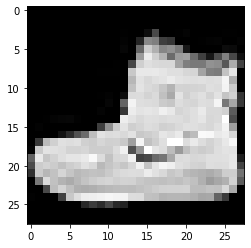

In [147]:
pic, labels= next(iter(train_ds))

print(pic.shape)
print(labels)
print(pic.dtype)  #float

print(type(pic),type(labels))

#print(pic[0][0])
plt.imshow(pic[0][0], cmap ='gray') #could use pic.squeeze()
plt.show()


In [124]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()

        # define layers
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)

        self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)

  # define forward function
    def forward(self, t):
        # conv 1
        t = self.conv1(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)

        # conv 2
        t = self.conv2(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)

        # fc1
        t = t.reshape(-1, 12*4*4)
        t = self.fc1(t)
        t = F.relu(t)

        # fc2
        t = self.fc2(t)
        t = F.relu(t)

        # output
        t = self.out(t)
        # don't need softmax here since we'll use cross-entropy as activation.

        return t
    
Network()

Network(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)

In [167]:
from torch.autograd import Variable

epochs= 3
learning_rate = 0.01

model = Network()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
criterion = nn.CrossEntropyLoss()

total_step = len(train_ds)

#for param in model.parameters():
#    print(type(param), param.size())

model.train()
for epoch in range(epochs):
    loss_total = 0
    for i, (images, labels) in enumerate(train_ds):
        #zero the parameter gradients
        optimizer.zero_grad() # Sets the gradients of all optimized torch.Tensor s to zero.
        
        #forward+backward+optimize
        out = model(images)
        loss = criterion(out,labels)
        temp = loss.item()
        loss.backward() # computes dloss/dx for every parameter.accumulated into x.grad for every parameter
        optimizer.step()  # Performs a single optimization step. updates the value of x using the gradient x.grad.
        
        
        
        if (i+1)%2000 == 0:
            print('Epoch : {}, Step : {}, Loss : {}'.format(epoch+1, i+1, temp))
            loss_total = 0
        

Epoch : 1, Step : 2000, Loss : 0.005917766597121954
Epoch : 1, Step : 4000, Loss : 0.009331894107162952
Epoch : 1, Step : 6000, Loss : 0.020716829225420952
Epoch : 1, Step : 8000, Loss : 5.008325099945068
Epoch : 1, Step : 10000, Loss : 1.4058995246887207
Epoch : 1, Step : 12000, Loss : 0.8048622608184814
Epoch : 1, Step : 14000, Loss : 0.48857080936431885
Epoch : 1, Step : 16000, Loss : 0.5705184936523438
Epoch : 1, Step : 18000, Loss : 0.9870127439498901
Epoch : 1, Step : 20000, Loss : 0.3813696801662445
Epoch : 1, Step : 22000, Loss : 1.3470558769768104e-05
Epoch : 1, Step : 24000, Loss : 0.016960691660642624
Epoch : 1, Step : 26000, Loss : 0.1166604608297348
Epoch : 1, Step : 28000, Loss : 0.8935072422027588
Epoch : 1, Step : 30000, Loss : 0.0002479245886206627
Epoch : 1, Step : 32000, Loss : 3.85038583772257e-05
Epoch : 1, Step : 34000, Loss : 0.0011636398267000914
Epoch : 1, Step : 36000, Loss : 0.9798712134361267
Epoch : 1, Step : 38000, Loss : 0.3567570745944977
Epoch : 1, Step

KeyboardInterrupt: 

In [172]:

epochs= 3
learning_rate = 0.01

model = Network()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.002)
criterion = nn.CrossEntropyLoss()
train_b = torch.utils.data.DataLoader(train_f, batch_size = 1000)

for epoch in range(epochs):
    loss_total = 0
    batch_n = 0
    for batch in train_b:
        model.train()
        images, labels = batch
        #zero the parameter gradients
        optimizer.zero_grad() # Sets the gradients of all optimized torch.Tensor s to zero.
        
        #forward+backward+optimize
        out = model(images)
        loss = criterion(out,labels)
        loss.backward() # computes dloss/dx for every parameter.accumulated into x.grad for every parameter
        optimizer.step()  # Performs a single optimization step. updates the value of x using the gradient x.grad.
        
        loss_total += loss.item()
        batch_n+=1
        
        
        print('epoch: {}, batch: {}, loss : {}'.format(epoch+1, batch_n,loss.item()))
        loss_total = 0
        
        

epoch: 1, batch: 1, loss : 2.3012523651123047
epoch: 1, batch: 2, loss : 2.30334734916687
epoch: 1, batch: 3, loss : 2.296525478363037
epoch: 1, batch: 4, loss : 2.2867870330810547
epoch: 1, batch: 5, loss : 2.2720656394958496
epoch: 1, batch: 6, loss : 2.2601962089538574
epoch: 1, batch: 7, loss : 2.2376391887664795
epoch: 1, batch: 8, loss : 2.2119693756103516
epoch: 1, batch: 9, loss : 2.18949818611145
epoch: 1, batch: 10, loss : 2.138474941253662
epoch: 1, batch: 11, loss : 2.090165376663208
epoch: 1, batch: 12, loss : 2.0421152114868164
epoch: 1, batch: 13, loss : 1.9753972291946411
epoch: 1, batch: 14, loss : 1.8907575607299805
epoch: 1, batch: 15, loss : 1.8450435400009155
epoch: 1, batch: 16, loss : 1.764786958694458
epoch: 1, batch: 17, loss : 1.6911084651947021
epoch: 1, batch: 18, loss : 1.627849817276001
epoch: 1, batch: 19, loss : 1.5503262281417847
epoch: 1, batch: 20, loss : 1.4867289066314697
epoch: 1, batch: 21, loss : 1.4189327955245972
epoch: 1, batch: 22, loss : 1.3

epoch: 3, batch: 56, loss : 0.5242824554443359
epoch: 3, batch: 57, loss : 0.5853066444396973
epoch: 3, batch: 58, loss : 0.5394557118415833
epoch: 3, batch: 59, loss : 0.5514712929725647
epoch: 3, batch: 60, loss : 0.5965719223022461


In [173]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_ds:
        images, labels = data
        out = model(images)
        _, predicted = torch.max(out, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of network on the test images : {}%'.format(correct/total*100))



Accuracy of network on the test images : 77.63%


In [ ]:
#### https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html